In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\AirPassengers (1).csv")

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Transform in your time column

In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


# Index

In [6]:
df.index = df['Month']

In [7]:
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [8]:
df.drop(labels=['Month'],axis=1,inplace=True)

In [9]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
df.columns = ['Npass']

In [11]:
df

,Npass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Plot the time series

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
q = seasonal_decompose(df)

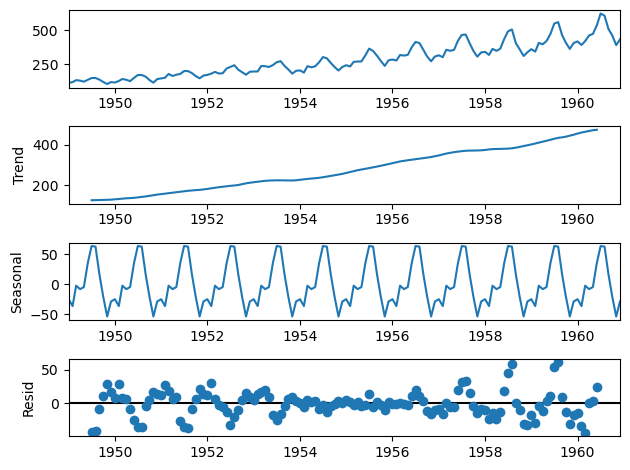

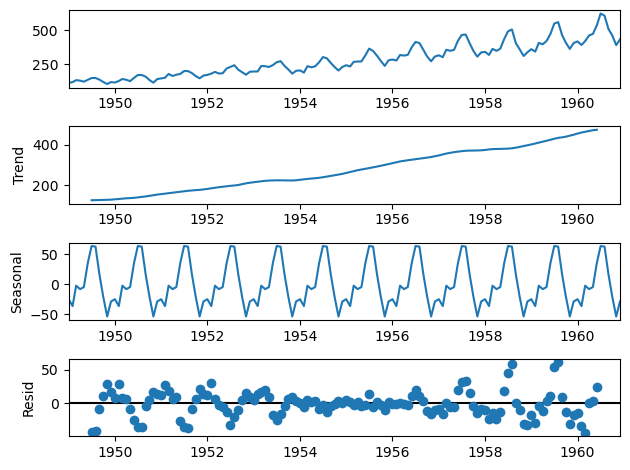

In [15]:
q.plot()

# subplots

In [16]:
import matplotlib.pyplot as plt

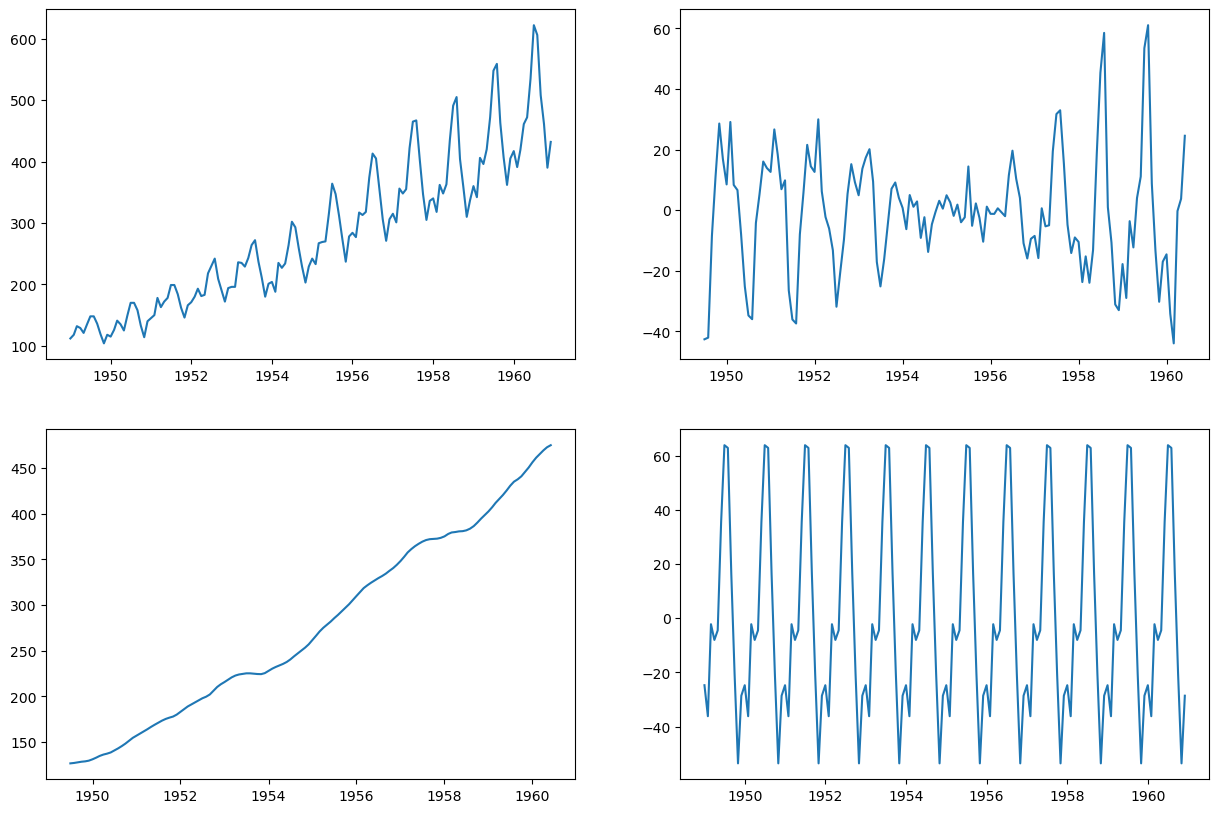

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(q.observed)

plt.subplot(2,2,2)
plt.plot(q.resid)

plt.subplot(2,2,3)
plt.plot(q.trend)

plt.subplot(2,2,4)
plt.plot(q.seasonal)

# Forecasting Model

In [22]:
df

,Npass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [23]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

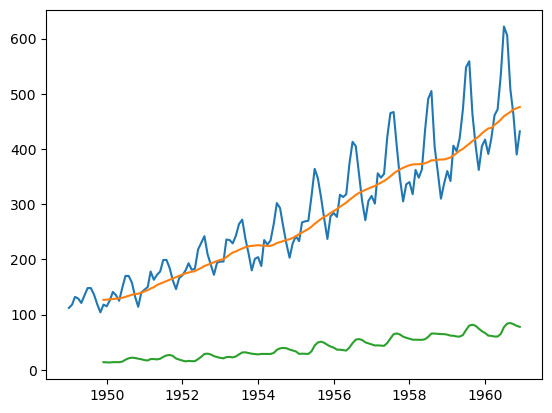

In [26]:
plt.plot(df)
plt.plot(rolling_mean)
plt.plot(rolling_std)

In [27]:
import numpy as np

In [29]:
log_df = np.log(df)

In [30]:
log_df

,Npass
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [31]:
log_rolling_mean = log_df.rolling(window=12).mean()

In [32]:
log_rolling_std = log_df.rolling(window=12).std()

In [33]:
log_rolling_mean

,Npass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,6.124517
1960-09-01,6.132246
1960-10-01,6.142628


In [35]:
q = log_df-log_rolling_mean

In [36]:
q

,Npass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


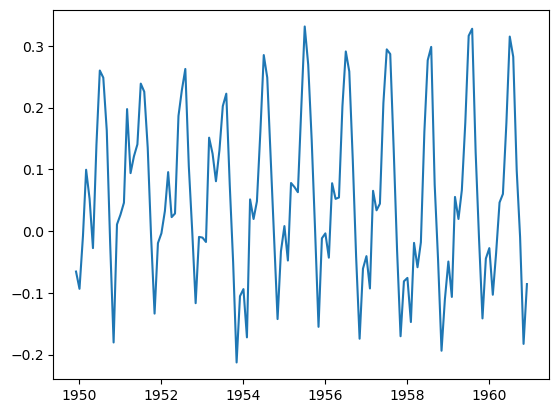

In [37]:
plt.plot(q)

In [39]:
q.isna().sum()

Npass    11
dtype: int64

In [42]:
Q = q[q.isna().Npass == False]

In [43]:
Q

,Npass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


# Lets split data into training and testing set

In [45]:
Q.shape

(133, 1)

In [46]:
Q.shape[0]*0.8/1

106.4

In [47]:
tr = Q[0:106]
ts = Q[106:]

In [48]:
tr

,Npass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1958-05-01,-0.018162
1958-06-01,0.160253
1958-07-01,0.276817


In [49]:
ts

,Npass
Month,
1958-10-01,-0.045657
1958-11-01,-0.193762
1958-12-01,-0.110499
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286


# Model Building

In [52]:
from statsmodels.tsa.ar_model import AutoReg

from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
model = AutoReg(tr,lags=12).fit()

In [56]:
pred = model.predict(start='1958-10-01',end='1960-12-01')

In [57]:
pred

1958-10-01   -0.037129
1958-11-01   -0.132256
1958-12-01   -0.086974
1959-01-01   -0.062510
1959-02-01   -0.136801
1959-03-01   -0.058226
1959-04-01   -0.071314
1959-05-01    0.003243
1959-06-01    0.149653
1959-07-01    0.261725
1959-08-01    0.280068
1959-09-01    0.116718
1959-10-01   -0.006373
1959-11-01   -0.107281
1959-12-01   -0.079117
1960-01-01   -0.064088
1960-02-01   -0.123009
1960-03-01   -0.086333
1960-04-01   -0.081786
1960-05-01    0.006613
1960-06-01    0.142615
1960-07-01    0.248930
1960-08-01    0.266477
1960-09-01    0.143491
1960-10-01    0.023656
1960-11-01   -0.077912
1960-12-01   -0.069704
Freq: MS, dtype: float64

In [58]:
'''q=ldf-lrm
   ldf=q+lrm

df=exponent(q+lrm)'''

'q=ldf-lrm\n   ldf=q+lrm\n\ndf=exponent(q+lrm)'

In [62]:
pred1 = pd.DataFrame(round(np.exp(pred+log_rolling_mean.tail(27).Npass),0))

In [64]:
pred1.columns = ['Npass']

In [65]:
pred1

,Npass
1958-10-01,362.0
1958-11-01,330.0
1958-12-01,345.0
1959-01-01,355.0
1959-02-01,332.0
1959-03-01,362.0
1959-04-01,362.0
1959-05-01,394.0
1959-06-01,460.0
1959-07-01,519.0


# compare your prediction with actual data

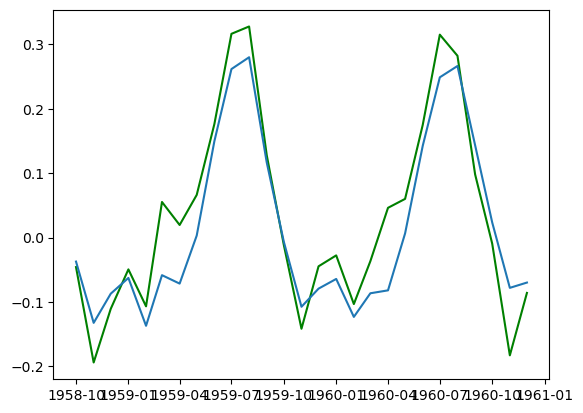

In [67]:
plt.plot(ts, c='green')
plt.plot(pred)